# Network Science - 1

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from IPython.display import Image
path1 = r'/home/nbuser/G1.csv'
path2 = r'/home/nbuser/G2.csv'
path3 = r'/home/nbuser/MatrizIncidencia.csv'
g1 = nx.read_adjlist(path1,delimiter=';',encoding='utf-8')
g2 = nx.read_adjlist(path2,delimiter=';',encoding='utf-8')
#g3 = nx.read_multiline_adjlist(path3,delimiter=';',encoding='utf-8')

#### 1) Monte um algoritmo para encontrar um caminho euleriano em um grafo. Sob que condições o algoritmo funciona?

Para que o algoritimo funcione, é necessário que nenhum ou dois vértices tem um grau ímpar.

###### Fleury`s Algorithm:

In [6]:
def next_node(edge, current):
    return edge[0] if current == edge[1] else edge[1]

def remove_edge(raw_list, discard):
    return [item for item in raw_list if item != discard]

def find_eulerian_tour(graph):
    search = [[[], graph[0][0], graph]]
    while search:
        path, node, unexplore = search.pop()
        path += [node]

        if not unexplore:
            return path

        for edge in unexplore:
            if node in edge:
                search += [[path, next_node(edge, node), remove_edge(unexplore, edge)]]

#### 2) Faça os exercícios do final do capítulo 2 do livro do Barabasi.

In [ ]:
# Feito em outro arquivo

#### 3) Implemente o algoritmo de busca em largura (BFS-algorithm). Use o algoritmo implementado para determinar as seguintes medias nas redes em anexo (essas redes estão codificadas como listas de arestas):

In [ ]:
g = {'1': set(['2', '3']),
         '2': set(['1', '4', '5']),
         '3': set(['1', '6']),
         '4': set(['2']),
         '5': set(['2', '6']),
         '6': set(['3', '5'])}

def bfs(g,start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(g[vertex] - visited)
    return visited

bfs1 = bfs(g, '1')
print('BFS: O número de nós alcancáveis partindo do nó "1" é {}.'.format(bfs1))

###### a) Número de componentes conexas

In [42]:
#Verificando:
cc1 = nx.number_connected_components(g1)
cc2 = nx.number_connected_components(g2)
print('NetworkX Built-In: O número de componentes conexas da rede G1 é {}.'.format(cc1))
print('NetworkX Built-In: O número de componentes conexas da rede G2 é {}.'.format(cc2))

NetworkX Built-In: O número de componentes conexas da rede G1 é 1.
NetworkX Built-In: O número de componentes conexas da rede G2 é 1.


###### b) Diâmetro 

In [41]:
#Verificando:
d1 = nx.diameter(g1)
d2 = nx.diameter(g2)
print('NetworkX Built-In: O diâmetro da rede G1 é {}.'.format(d1))
print('NetworkX Built-In: O diâmetro da rede G2 é {}.'.format(d2))

NetworkX Built-In: O diâmetro da rede G1 é 7.
NetworkX Built-In: O diâmetro da rede G2 é 100.


###### b) Distância média

In [53]:
#Verificando:
d1 = nx.average_shortest_path_length(g1)
d2 = nx.average_shortest_path_length(g2)
d1 = round(d1,2)
d2 = round(d2,2)
print('NetworkX Built-In: A distância média da rede G1 é {}.'.format(d1))
print('NetworkX Built-In: A distância média da rede G2 é {}.'.format(d2))

NetworkX Built-In: A distância média da rede G1 é 4.41.
NetworkX Built-In: A distância média da rede G2 é 50.45.


#### 4) Explique por que a dimensão do núcleo da matriz de incidência B de um grafo direcionado é o número de componentes conexas do grafo. 

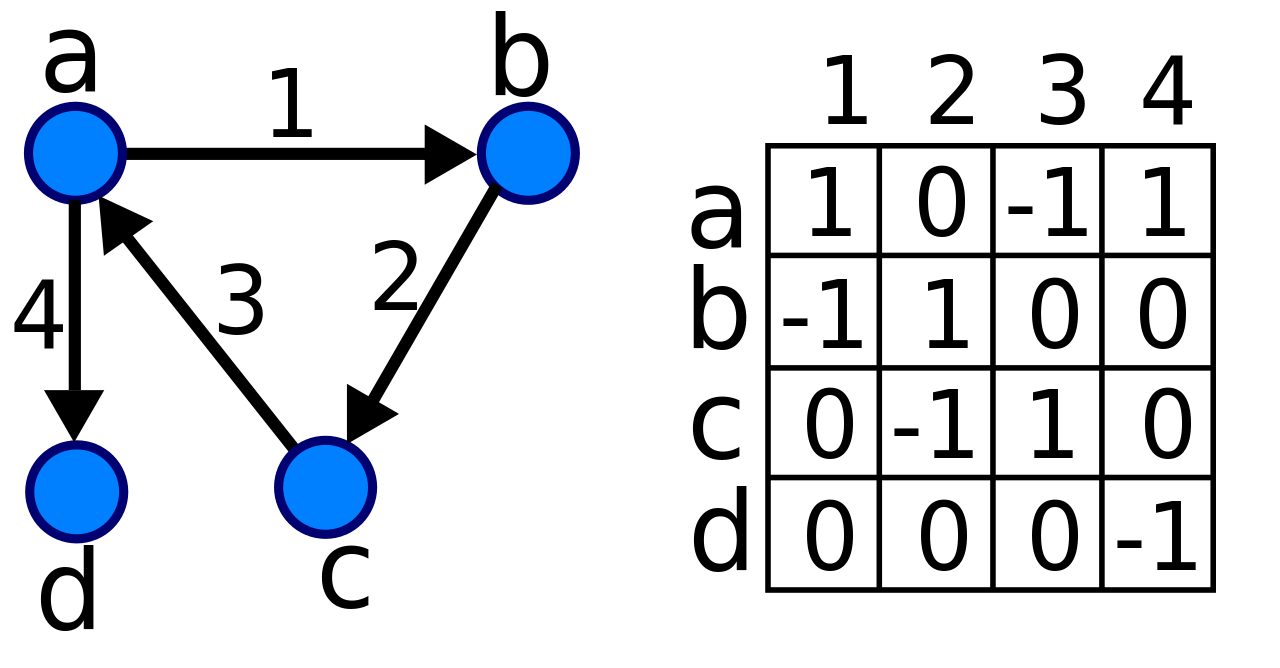

In [8]:
Image(filename = "/home/nbuser/incidence.png", width = "200" , height = "200")

$
  I=
  \left[ {\begin{array}{cc}
   \ 1  & 0  & -1  & 1  \\
   \ -1 & 1  & 0   & 0  \\
   \ 0  & -1 & 1   & 0  \\
   \ 0  & 0  & 0   & -1 \\
  \end{array} } \right]
$

$I' = I$ Escalonada :

$
  I'=
  \left[ {\begin{array}{cc}
   \ 1  & 0  & -1  & 0   \\
   \ 0  & 1  & -1  & 0   \\
   \ 0  & 0  & 0    & 1  \\
   \ 0  & 0  & 0   & 0   \\
  \end{array} } \right]
$

Base do espaco nulo:

$
  Null=
  \left[ {\begin{array}{cc}
   \ 0.5774 \\
   \ 0.5774 \\
   \ 0.5774 \\
   \ 0 \\
  \end{array} } \right]
$

Cuja dimensao é igual ao número de colunas com pivot $\neq 1$

#### 5) Explique por que a multiplicidade geométrica do autovalor $\lambda = 0$ da matriz laplaciana $L$ de um grafo é o número de componentes conexas. $(Obs: L= B^TB)$

Dado que:

$L = D - A = B^TB$

$L - \lambda I = 0$

$L = 0$

$B^TBx = 0 \Longrightarrow x^TB^TBx = 0 \Longrightarrow (Bx)^TBx = 0$

#### 6) Investigue como as medidas do item (3) podem ser obtidas de modo eficiente (em tempo e em memória) usando a matriz de incidência ou a laplaciana.

* Como vemos acima podemos encontrar o número de componentes conexas pela dimensao do espaco nulo da matriz laplaciana

* A distancia pode ser encontrada elevando a matriz de adjacencia A ao valor da distancia n, assim teremos em $A_{i,j}$ o número de caminhos de tamanho n de i a j